# Jax

In [6]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

## Jax is autograd and XLA

In [8]:
import jax
import jax.numpy as jnp # jax version of numpy

# Why jax?
Gradients, linear algebra, and vectorisation operations are ubiquitous in machine learning

* Jax is numpy for machine learning
* Jax is numpy +
    1. Gradients
    2. non-trivial vectorisations
    3. parallelisation
    4. speed

## A first program with jax

In [69]:
def f(x):
    return jnp.sin(x)

In [70]:
f(0.0)

Array(0., dtype=float32, weak_type=True)

## (Almost) we can do in numpy we can do in jax

`jax.numpy` is a drop-in replacement for `numpy`. Some examples

In [71]:
jnp.arange(10) # np.arange(10)
jnp.linspace(0, 1, 100) # np.linspace(0, 1, 100)
jnp.sin # np.sin
jnp.linalg.solve # np.linalg.solve

<PjitFunction of <function solve at 0x7f221131c940>>

## Gradients in jax
For a given function `f`, we can compute the *exact* gradient of `f` with respect to the first parameter in the function as
`jax.grad(f)`.
For example

In [72]:
df = jax.grad(f) # cos(x)
df(0.0) # cos(0)

Array(1., dtype=float32, weak_type=True)

Gradients are defined for scalar-output functions.

An important implication is that if scalar-output function is vectorisable,
the gradient of that scalar-output is not vectorisible.
This is because if we evaluate `f` using an `n`-dimensional array `xv`, then `len(f(xv)) == n`.

Consider the following example

In [73]:
xv = jnp.linspace(-jnp.pi, jnp.pi, 100)
f(xv)

Array([ 8.7422784e-08, -6.3423857e-02, -1.2659244e-01, -1.8925104e-01,
       -2.5114805e-01, -3.1203350e-01, -3.7166259e-01, -4.2979503e-01,
       -4.8619670e-01, -5.4064083e-01, -5.9290773e-01, -6.4278746e-01,
       -6.9007891e-01, -7.3459160e-01, -7.7614641e-01, -8.1457585e-01,
       -8.4972537e-01, -8.8145334e-01, -9.0963197e-01, -9.3414789e-01,
       -9.5490223e-01, -9.7181165e-01, -9.8480773e-01, -9.9383849e-01,
       -9.9886733e-01, -9.9987411e-01, -9.9685478e-01, -9.8982149e-01,
       -9.7880250e-01, -9.6384221e-01, -9.4500089e-01, -9.2235434e-01,
       -8.9599377e-01, -8.6602527e-01, -8.3256984e-01, -7.9576182e-01,
       -7.5574952e-01, -7.1269429e-01, -6.6676903e-01, -6.1815906e-01,
       -5.6705993e-01, -5.1367742e-01, -4.5822650e-01, -4.0093049e-01,
       -3.4202030e-01, -2.8173247e-01, -2.2031064e-01, -1.5800147e-01,
       -9.5055975e-02, -3.1728067e-02,  3.1727828e-02,  9.5055975e-02,
        1.5800147e-01,  2.2031052e-01,  2.8173259e-01,  3.4202018e-01,
      

In [74]:
df(xv)

TypeError: Gradient only defined for scalar-output functions. Output had shape: (100,).

## Vectorising output-valued functions: `jax.vmap`

To overcome the problem above, we can use the `jax.vmap` function to declare which parameters should be considered element-wise.
The function `jax.vmap` both takes and returns a function whose inputs are evaluated element-wise.

Consider a one-dimensional array `x.shape == (N,)` and a function `f`. Calling `jax.vmap(f)(x)` amounts to evaluating.
```python
jax.vmap(f)(x) = [f(x[0]), f(x[1]), ..., f(x[-1])]
```

Note that `jax.vmap(f)` is a function itself, so it's common to store this function inside a variable.

In [75]:
# Vectorised derivative of f
vdf = jax.vmap(df)
vdf(xv)

Array([-1.        , -0.9979867 , -0.9919548 , -0.98192877, -0.96794873,
       -0.95007116, -0.9283679 , -0.90292645, -0.8738494 , -0.8412535 ,
       -0.8052704 , -0.7660446 , -0.72373414, -0.6785096 , -0.63055277,
       -0.580057  , -0.52722555, -0.4722711 , -0.41541502, -0.3568862 ,
       -0.29692057, -0.23575886, -0.17364842, -0.11083819, -0.04758186,
        0.01586581,  0.07925007,  0.14231463,  0.20480649,  0.26647368,
        0.32706788,  0.38634503,  0.44406658,  0.5000002 ,  0.55392003,
        0.6056097 ,  0.65486085,  0.7014747 ,  0.7452645 ,  0.78605306,
        0.8236765 ,  0.85798335,  0.88883543,  0.9161085 ,  0.9396926 ,
        0.95949304,  0.9754298 ,  0.9874389 ,  0.99547195,  0.9994965 ,
        0.9994965 ,  0.99547195,  0.9874389 ,  0.97542983,  0.959493  ,
        0.9396926 ,  0.9161085 ,  0.88883543,  0.85798335,  0.8236765 ,
        0.7860531 ,  0.7452645 ,  0.70147496,  0.65486085,  0.6056097 ,
        0.55392003,  0.49999988,  0.44406664,  0.38634515,  0.32

In the example above, calling `vdf(x)` can be thought of as
```python
vdf(x) = [jax.grad(f)(x[0]), jax.grad(f)(x[1]), ..., jax.grad(f)(x[-1])]
```

### Example
Plotting `f(x)` and `df(x)`.

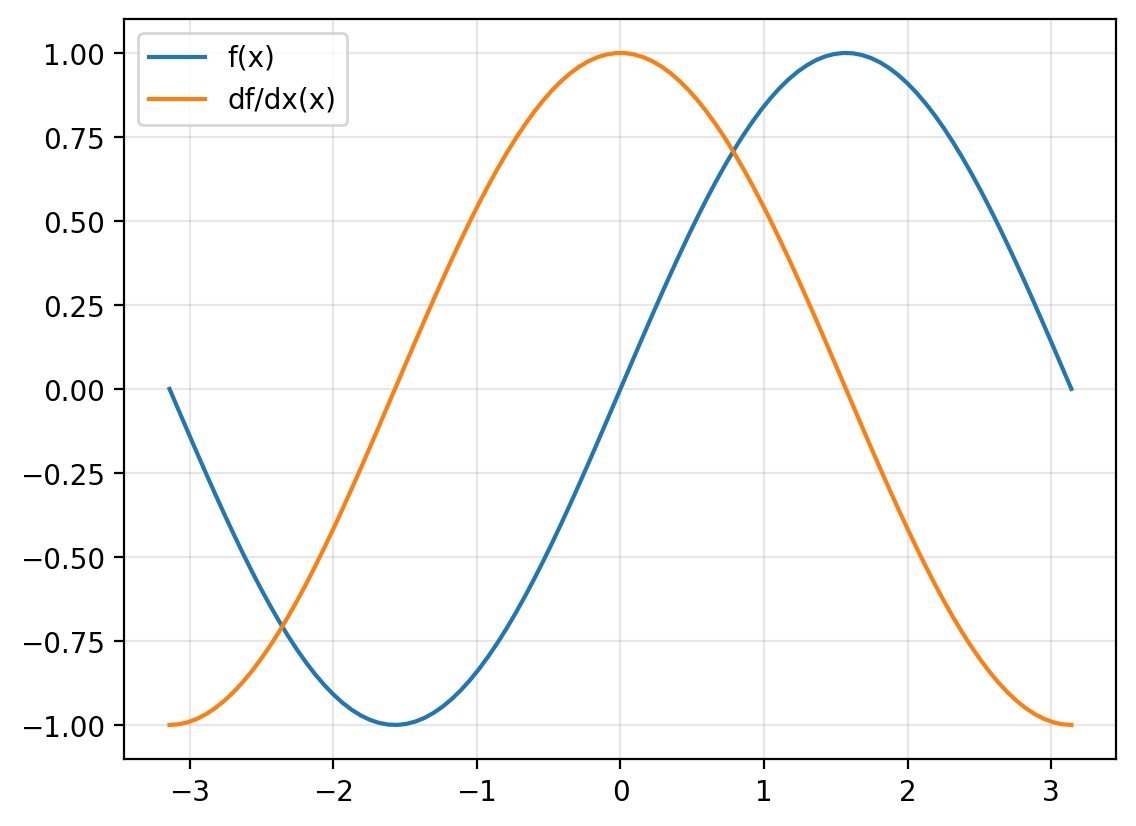

In [76]:
x = jnp.linspace(-jnp.pi, jnp.pi, 100)
plt.plot(x, f(x), label="f(x)")
plt.plot(x, vdf(x), label="df/dx(x)")
plt.legend()
plt.grid(alpha=0.3)

## practical considertions using `jax.vmap`

For a function `f(x,y,z)`, then
```python
jax.vmap(f)(x,y,z) = [f(x[0], y[0], z[0]), ..., f(x[-1], y[-1], z[-1])]
```

At times, we want to vectorise over a single parameter and treat other parameters as fixed. In the example above, suppose we seek to evaluate 
```python
[f(x[0], y, z), ..., f(x[-1], y, z)]
```

or perhaps we're interested in evaluating
```python
[f(x[0], y, z[0]), ..., f(x[-1], y, z[-1])]
```

Or, if `x.shape = (N, M)`, suppose we want to vectorise over the second axis to obtain
```python
[f(x[:, 0], y, z), ..., f(x[:, -1], y, z)]
```

In all cases above, we can make use of the `in_axes` parameter in `jax.vmap` to specify over which parameters we want to vectorise. The `in_axes` parameter eiter takes an integer that specifies over which axes all parameters shuold be evaluated over (`in_axes=0` by default), or a tuple that is the same length as number of parameters in the function. In the latter case, each tuple has either an `int` indicating which axes to map over a specific parameter or `None` if the element should be taken as-is.

For the examples above, vectorising the function `f(x,y,z)` using `jax.vmap` over the first axes of the first parameter (`x`) and fixing `y` and `z` is done as
```python
jax.vmap(f)(in_axes=(0, None, None))(x, y, z) = [f(x[0], y, z), ..., f(x[-1], y, z)]
```

Vectorising `f(x,y,z)` over the first first axes of `x` and `z` and fixing `y`
```python
jax.vmap(f)(in_axes=(0, None, 0))(x, y, z) = [f(x[0], y, z[0]), ..., f(x[-1], y, z[-1])]
```

### Example: the density and derivative of the density of a Normally-distributed random variable

$$
    f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2}(x - \mu)^2\right)
$$

In [184]:
def f(x, mu, sigma2):
    return 1 / jnp.sqrt(jnp.pi * sigma2) * jnp.exp(-(x - mu) ** 2 / (2 * sigma2))


df = jax.vmap(jax.grad(f), in_axes=(0, None, None))

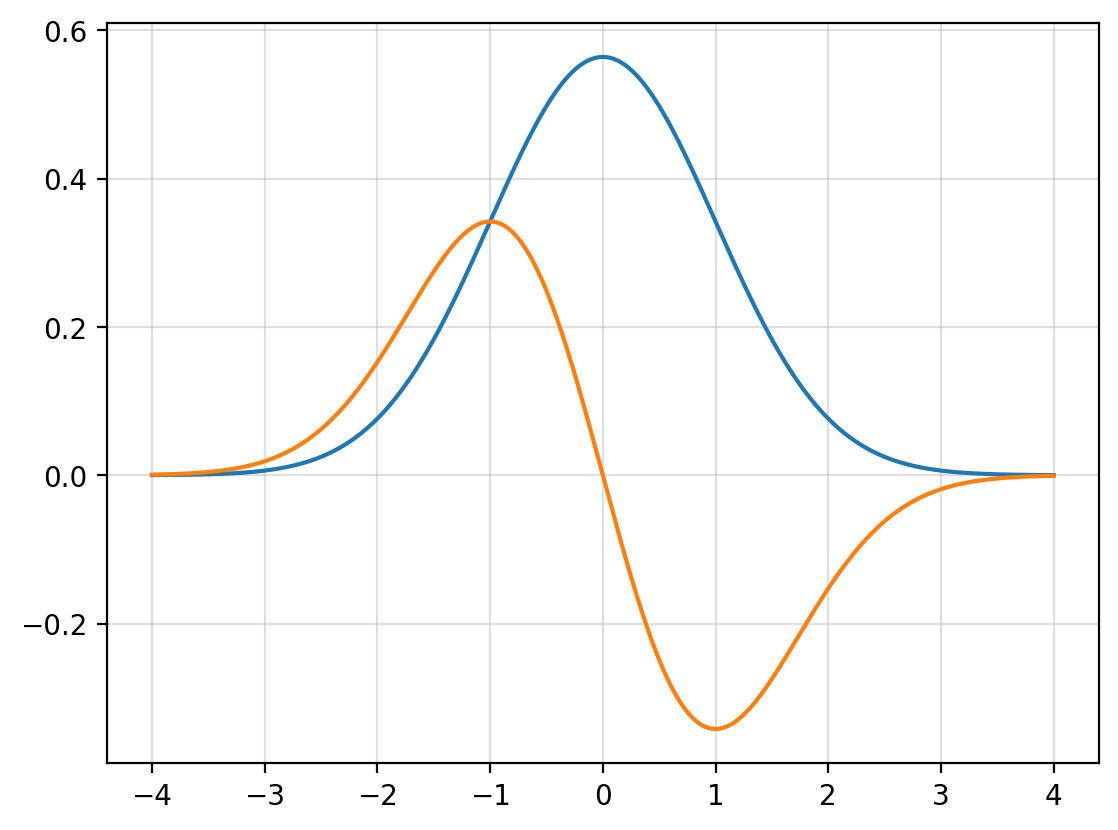

In [185]:
xrange = jnp.linspace(-4, 4, 500)
mu = 0.0
sigma2 = 1.0

plt.plot(xrange, f(xrange, mu, sigma2))
plt.plot(xrange, df(xrange, mu, sigma2))
plt.grid(alpha=0.4)

## Composition of `jax.vmap`
Suppose we're interested in evaluating `f(x, mu, sigma)` for multiple values of `x.shape == (N,)` and `sigma.shape==(M,)` with fixed `mu`. We would expect to see an `(N,M)`-dimensional array evaluated as follows

```python
[
    [f(x[0], mu, sigma[0]), ..., f(x[-1], mu, sigma[-1])],
    ...,
    [f(x[-1], mu, sigma[-1]), ..., f(x[-1], mu, sigma[-1])],
]
```

To this using `vmap`, we can do a function composition of `vmap`. Consider the following

```python
jax.vmap(jax.vmap(f, in_axes=(None, None, 0), in_axes=(0, None, None)))(x, mu, sigma)
= [
    jax.vmap(f, in_axes=(0, None, None)(x, mu, sigma[0]),
    ...,
    jax.vmap(f, in_axes=(0, None, None)(x, mu, sigma[-1]),
] # M columns
= [
    [f(x[0], mu, sigma[0]), ..., f(x[-1], mu, sigma[0])],
    ...
    [f(x[0], mu, sigma[-1]), ..., f(x[-1], mu, sigma[-1])],
]
```

In [195]:
sigma_values = jnp.array([0.1, 0.5, 1.0, 5.0])

In [205]:
fv = jax.vmap(f, in_axes=(None, None, 0))
fv = jax.vmap(fv, in_axes=(0, None, None))
sigma_values = jnp.array([0.1, 0.5, 1.0, 5.0])

fv(xrange, mu, sigma_values).shape

(500, 4)

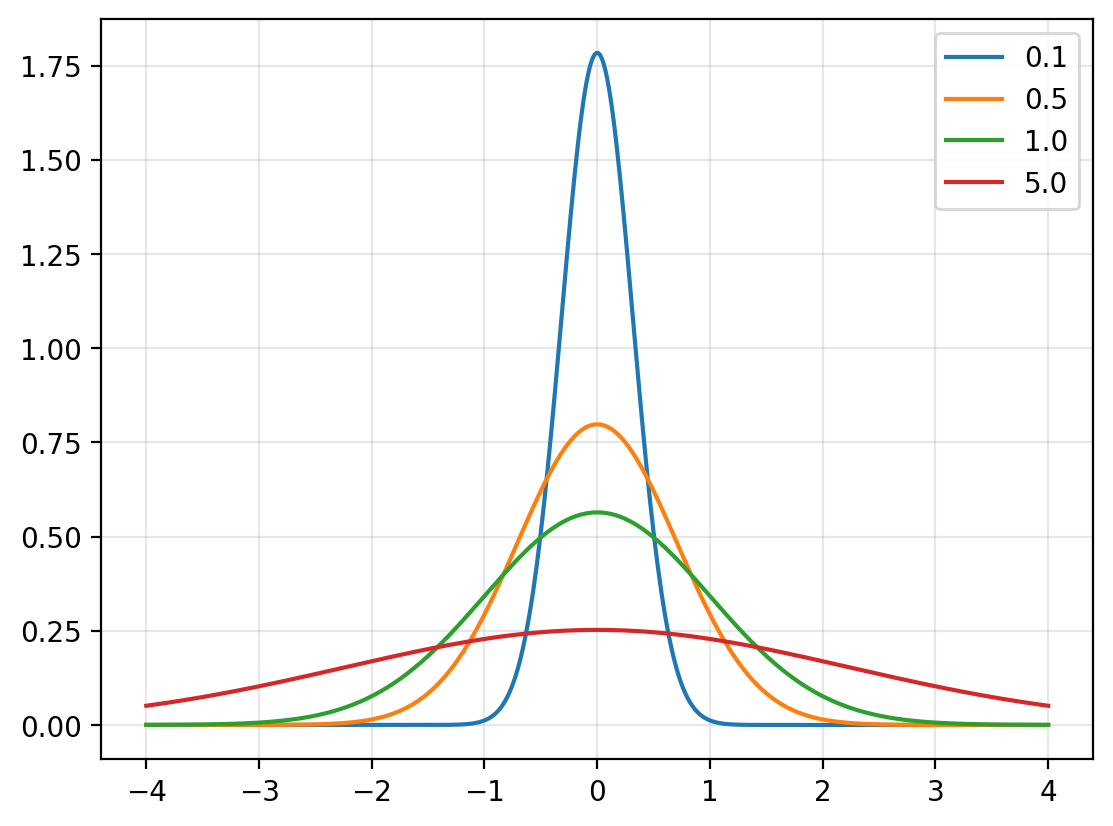

In [203]:
plt.plot(xrange, fv(xrange, mu, sigma_values), label=sigma_values)
plt.legend()
plt.grid(alpha=0.3)

### Example: Evaluate `df/dx` over multiple values of `sigma`

In [178]:
sigma_values = jnp.array([0.3, 0.5, 1.0, 3.0])

In [179]:
dfv = jax.vmap(jax.grad(f), in_axes=(0, None, None))
dfv = jax.vmap(dfv, in_axes=(None, None, 0))

dfv(xrange, mu, sigma_values).shape

(4, 500)

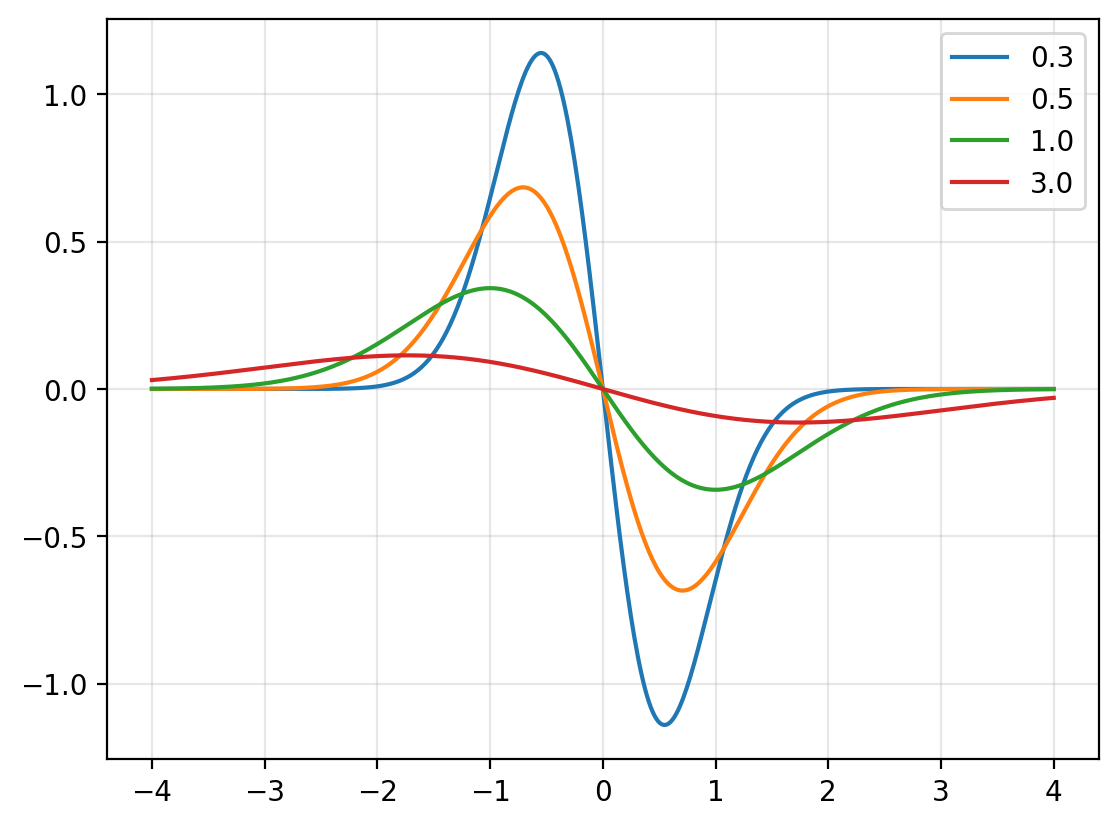

In [180]:
plt.plot(xrange, dfv(xrange, mu, sigma_values).T, label=sigma_values)
plt.legend()
plt.grid(alpha=0.3)

## Higher order derivatives in jax
### Jacobians

### Example: first-order optimisation of a non-linear function

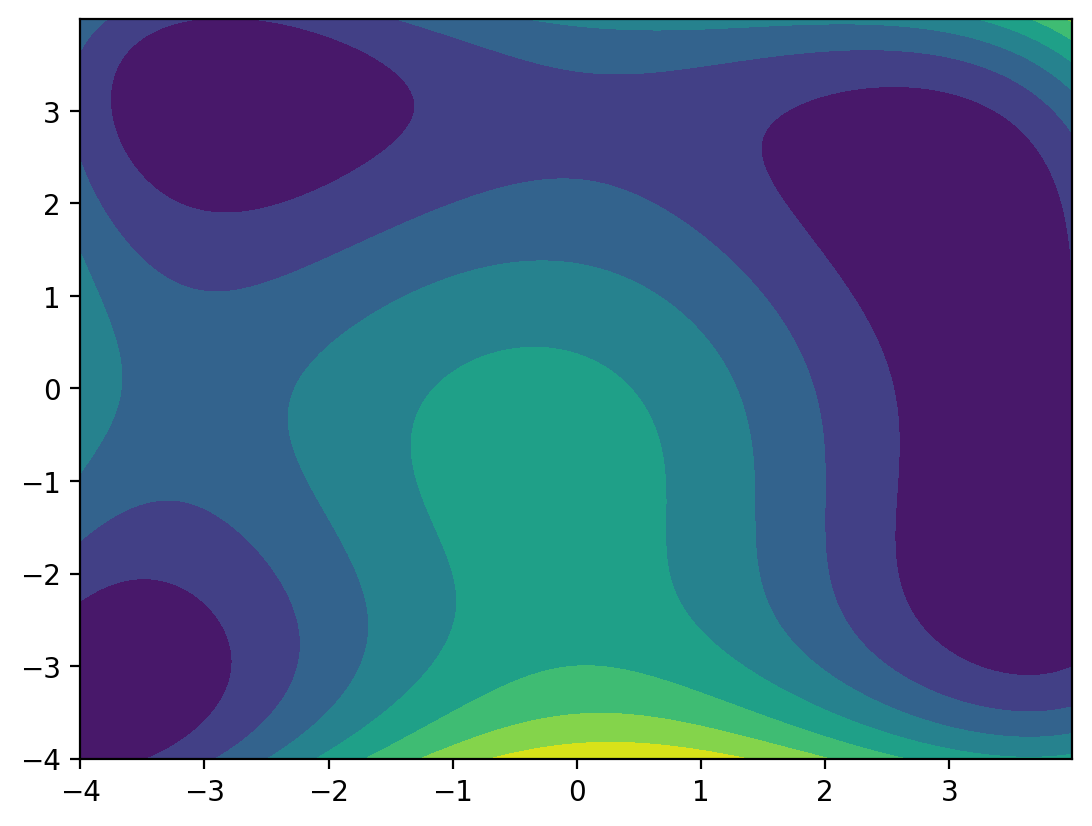

In [30]:
def f(x, y):
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

X = jnp.mgrid[-4:4:0.01, -4:4:0.01]

plt.contourf(*X, f(*X))